<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Введение в рекуррентные нейронные сети

### Занятие 1. Введение в нейронные сети

<br />
<br />
10 января 2022

### Задачи, решаемые нейросетями

<table style="width:100%">
  <tr>
    <td><div align="center">
        Картинки
        <img src="images/image_net.jpg" />
        25% $\to$ 3.5% ошибок против 5% у людей
        </div>
    </td>
    <td><div align="center">
        Текст
        <img src="images/machine_translation.png"/>
        </div>
    </td>
    <td><div align="center">
        Голос
        <img src="images/voice.jpg"/>
        </div>
    </td>
  </tr>
  <tr>
    <td><div align="center">
        Го, 2016
        <img src="images/alpha_go.jpg"/>
        </div>
    </td>
    <td><div align="center">
        StarCraft, 2019
        <img src="images/starcraft.png"/>
        </div>
    </td>
    <td><div align="center">
        Структура белка, 2020
        <img src="images/AlphaFold.png"/>
        </div>
    </td>
  </tr>


<div align="center">
    <img src="images/imagenet_progress_pwc.jpeg" alt="logo_fmkn" />
    <a href="https://paperswithcode.com/sota/image-classification-on-imagenet">
        https://paperswithcode.com/sota/image-classification-on-imagenet</a> 
</div>

<div align="center">
    <img src="images/QA_progress.jpeg" />
    <a href="https://paperswithcode.com/sota/question-answering-on-wikiqa">
        https://paperswithcode.com/sota/question-answering-on-wikiqa</a> 
</div>

### Линейная модель

 $f_j: X \to \mathbb{R}$ — числовые признаки
 
 $a(x, w) = \sigma(\left<w, x\right>) = \sigma \left(\sum\limits_{j=1}^n w_j f_j(x) - w_0 \right)$, 
 
 
 где $w_1, \dots, w_n \in \mathbb{R}$ — веса признаков, $w_0$ — порог активации
 
 $\sigma(z)$ — функция активации, например, $\text{sign}(z),\ \frac{1}{1+e^{-z}},\ (z)_+$

<div align="center">
    <img src="images/lin_as_nn.jpg" alt="lin_as_nn" width=600 />
</div>


<div align="center">
    <img src="images/460px-Neuron-rus.png" alt="nueron_ru" width=800 />
</div>

### Нейронная сеть как комбинация линейных моделей

<div align="center">
    <img src="images/nn_two_layers_cropped.jpg" alt="nn_two_layers_cropped" width=1000 />
</div>


In [2]:
import tensorflow.keras as keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

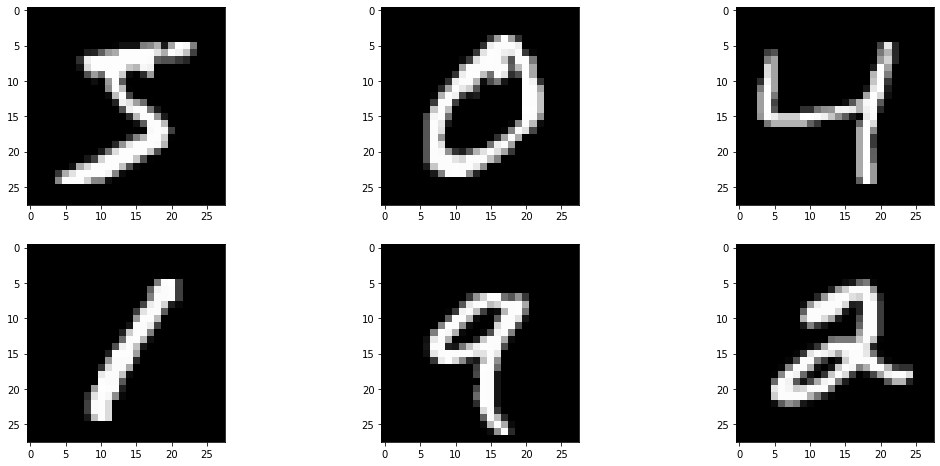

In [3]:
import matplotlib.pyplot as plt
import matplotlib

fig, gs = plt.figure(figsize=(18, 8)), matplotlib.gridspec.GridSpec(2, 3)

for i in range(6):
    plot = fig.add_subplot(gs[i])
    plot.imshow(x_train[i], cmap='gray') # cmap='gray_r'

plt.show()

In [18]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train[0, 5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

<div align="center">
    <img src="images/cnn_architecture.jpg" width=800 />
    <a href="https://www.pyimagesearch.com/wp-content/uploads/2014/06/cnn_architecture.jpg">
        Source</a> 
</div>

### Линейный классификатор

Предсказание $$ \text{y_pred} = x \cdot W + b $$

<div align="center">
    <img src="images/linear_classification_scheme.jpg" width=700/>
    $x\quad\quad\quad\cdot\quad W\quad\quad\quad+\quad b$
</div>


### Десять разделяющих плоскостей

<div align="center">
    <img src="images/2D_example.jpg" width=800/>
</div>

 * В нашем примере пространство 784-мерное ($\mathbb{R}^{784}$)


<div class="alert alert-info">
<b>Вопрос 1:</b> Как найти лучшие параметры: матрицу весов $W$ и смещение $b$?
</div>

Если бы $\text{y_true}_i \in \mathbb{R}$, то есть задача линейной регресии, то для минимизации суммы квадратов разностей (метод наименьших квадратов) ответ вычисляется **аналитически** формулой:
$$\hat{W} = (X^TX)^{-1}X^T\text{y_true}$$

В общем случае решается **численно** минимизацией функции потерь. Чаще всего градиентным спуском (gradient descent).

<div align="center">
    <img src="images/momentum.jpg" width=900/>
</div>

[Distill.pub momentum](https://distill.pub/2017/momentum/)

### Softmax — для классификации

Переводим наши ответы линейной модели в вероятности классов:

$$ p(c=0| x) = \frac{e^{y_0}}{e^{y_0}+e^{y_1}+\dots+e^{y_n}} = \frac{e^{y_0}}{\sum\limits_i e^{y_i}} \\
   p(c=1| x) = \frac{e^{y_1}}{e^{y_0}+e^{y_1}+\dots+e^{y_n}} = \frac{e^{y_1}}{\sum\limits_i e^{y_i}} \\
   \dots
$$


### Принцип максимального правдоподобия

$\arg\max\limits_w {P(Y|w, X)P(w)} \color{red}{=} \arg\max\limits_w \prod\limits_{i=1}^\ell {P(y_i|w, x_i)P(w)} = \\ \arg\max\limits_w \sum\limits_{i=1}^l \log P(y_i|w, x_i) + \log P(w)$


### Минимизация функции потерь

$$L(w) = \sum\limits_{i=1}^\ell {\mathcal{L}(y_i, x_i, w)} = -\ln P(y_i|w, x_i) \to \min\limits_w$$

 * это cross-entropy loss для случая $y_i \in \{0, 1\}$
 * в нашем случае

$$ L(W, b) = - \sum\limits_j \ln \frac{e^{(x_jW + b)_{y_j}}}{\sum\limits_i e^{(x_jW + b)_{i}}}$$

 * минимум функции находим стохастическим градиентным спуском

$$ W^{k+1} = W^{k} - \eta \frac{\partial L}{\partial W} \\
   b^{k+1} = b^{k} - \eta \frac{\partial L}{\partial b}$$



### Регуляризация

$$ L(W, b) = - \sum\limits_j \ln \frac{e^{(x_jW + b)_{y_j}}}{\sum\limits_i e^{(x_jW + b)_{i}}} + \lambda R(W, b) \\
   R(W, b) = \|W\|_2^2 + \|b\|_2^2 \\
   \|b\|_2^2 = b_0^2 + \dots + b_k^2
$$

<div align="center">
    <img src="images/regularization.png" width=400/>
</div>


### Однослойная нейросеть для классификации

Для построения нейронной сети на Python воспользуемся библиотекой keras. Это в свою очередь высокоуровневая надстройка над tensorflow. Большим ее преимуществом является интерфейс, совместимый с sklearn.

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Для того, чтобы градиенты были более стабильными, поделим входные данные на 255 (чтобы они были из диапозона [0,1]). И запустим обучение.

In [5]:
model.fit(x_train.astype("float32") / 255, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 927us/step - loss: 0.7753 - accuracy: 0.8154
Epoch 2/20
1875/1875 [==============================] - 2s 891us/step - loss: 0.4549 - accuracy: 0.8805
Epoch 3/20
1875/1875 [==============================] - 2s 862us/step - loss: 0.4023 - accuracy: 0.8912
Epoch 4/20
1875/1875 [==============================] - 2s 823us/step - loss: 0.3760 - accuracy: 0.8967
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3594 - accuracy: 0.9007
Epoch 6/20
1875/1875 [==============================] - 2s 824us/step - loss: 0.3476 - accuracy: 0.9034
Epoch 7/20
1875/1875 [==============================] - 2s 825us/step - loss: 0.3387 - accuracy: 0.9055
Epoch 8/20
1875/1875 [==============================] - 2s 824us/step - loss: 0.3315 - accuracy: 0.9075
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3257 - accuracy: 0.9092
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step

<div align="center">
    <img src="images/kot-spit-mem.jpeg" width=900/>
</div>

<div class="alert alert-info">
<b>Вопрос 2:</b> Какое качество получилось?
</div>

In [6]:
import numpy as np

np.argmax(model.predict(x_test.astype("float32") / 255), axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(model.predict(x_test.astype("float32") / 255), axis=1), y_test)

0.9201

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Резюме

 * Нейрон = линейная классификация или регрессия
 * Нейронная сеть = суперпозиция нейронов с нелинейной функцией активации
 * Глубокое обучение покоряет мир